In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn as sk
import tensorflow as tf

df = pd.read_csv('audi_challenge.csv')


df.head()




2025-11-13 13:43:21.609844: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-13 13:43:21.649207: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-13 13:43:22.430448: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


,index,car description,price (euro),age (year),fuel type,transmission,bodystyle,car model,mileage (km)
0,0,"Audi A3 1.8 TFSI 160pk S tronic S-Line (Xenon,...",13650.0,9,Petrol,Automatic,Cabriolet,A3,115174
1,1,Audi A7 Sportback 55 TFSI 340pk Quattro Pro Li...,91800.0,1,Petrol,Automatic,Hatchback,A7,8527
2,2,Audi A3 1.6 TDI 110 PK S-Line | Xenon | Bang &...,26150.0,3,Diesel,Manual,Sedan,A3,82345
3,3,Audi A8 Lang 3.0 TDI 258pk Tiptronic Quattro P...,50900.0,4,Diesel,Automatic,Sedan,A8,144772
4,4,Audi TT 1.8 TFSI Coupe Pro Line -MMI+/Xenon/St...,37700.0,2,Petrol,Manual,Coupe,TT,16652


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7922 entries, 0 to 7921
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            7922 non-null   int64  
 1   car description  7922 non-null   object 
 2   price (euro)     7122 non-null   float64
 3   age (year)       7922 non-null   int64  
 4   fuel type        7922 non-null   object 
 5   transmission     7922 non-null   object 
 6   bodystyle        7922 non-null   object 
 7   car model        7922 non-null   object 
 8   mileage (km)     7922 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 557.1+ KB


In [3]:
del df['car description']
df.head()

,index,price (euro),age (year),fuel type,transmission,bodystyle,car model,mileage (km)
0,0,13650.0,9,Petrol,Automatic,Cabriolet,A3,115174
1,1,91800.0,1,Petrol,Automatic,Hatchback,A7,8527
2,2,26150.0,3,Diesel,Manual,Sedan,A3,82345
3,3,50900.0,4,Diesel,Automatic,Sedan,A8,144772
4,4,37700.0,2,Petrol,Manual,Coupe,TT,16652


In [4]:
df.describe()

,index,price (euro),age (year),mileage (km)
count,7922.000000,7122.000000,7922.000000,7922.000000
mean,3960.500000,33214.490312,5.381343,87390.918329
std,2287.028749,26942.203661,4.596769,81287.340268
min,0.000000,350.000000,0.000000,0.000000
25%,1980.250000,15700.000000,1.000000,10586.250000
50%,3960.500000,26150.000000,5.000000,74598.500000
75%,5940.750000,41850.000000,8.000000,142303.500000
max,7921.000000,324350.000000,56.000000,567483.000000


In [5]:
df["km/year"] = df["mileage (km)"]/df["age (year)"]
df.fillna(0, inplace=True)

In [ ]:
def parse_car_description(description: str) -> Tuple[float | None, float | None]:
    """Extract approximate engine displacement and horsepower from a car description.

    Parameters
    ----------
    description : str
        The free‑text description of the car.

    Returns
    -------
    Tuple[float | None, float | None]
        ``(engine_displacement, horsepower)`` where missing values are
        represented as ``None``.
    """
    text = str(description).lower()
    displacement: float | None = None
    horsepower: float | None = None
    # Engine size appears before TFSI/TSI/TDI (e.g. "1.8 tfsi" or "50 tdi")
    match_disp = re.search(r'(\d+(?:\.\d+)?)\s*(?=t[f]?si|tdi)', text)
    if match_disp:
        try:
            displacement = float(match_disp.group(1))
        except ValueError:
            displacement = None
    # Horsepower appears as "160pk", "160 pk" or "160 hp"
    match_hp = re.search(r'(\d+)\s?pk', text)
    if match_hp:
        horsepower = float(match_hp.group(1))
    else:
        match_hp = re.search(r'(\d+)\s?hp', text)
        if match_hp:
            horsepower = float(match_hp.group(1))
    return displacement, horsepower



In [6]:
df_train = df.iloc[:7122,:]
df_test = df.iloc[7122:,:]

<Axes: >

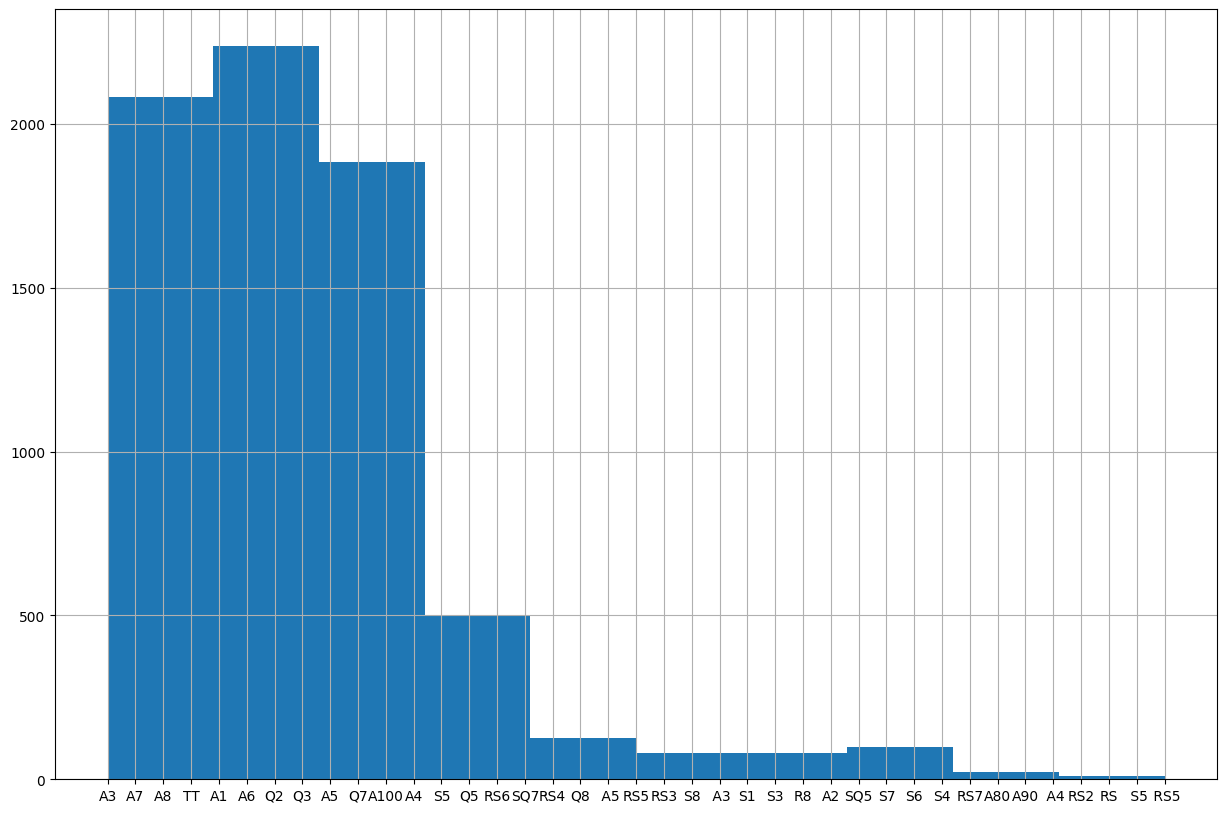

In [7]:
fig = plt.figure(figsize=(15,10))
df_train['car model'].hist()


array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'price (euro)'}>],
       [<Axes: title={'center': 'age (year)'}>,
        <Axes: title={'center': 'mileage (km)'}>],
       [<Axes: title={'center': 'km/year'}>, <Axes: >]], dtype=object)

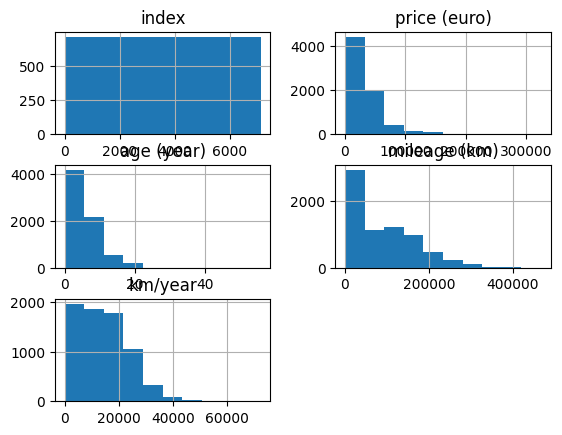

In [8]:
df_train.hist()

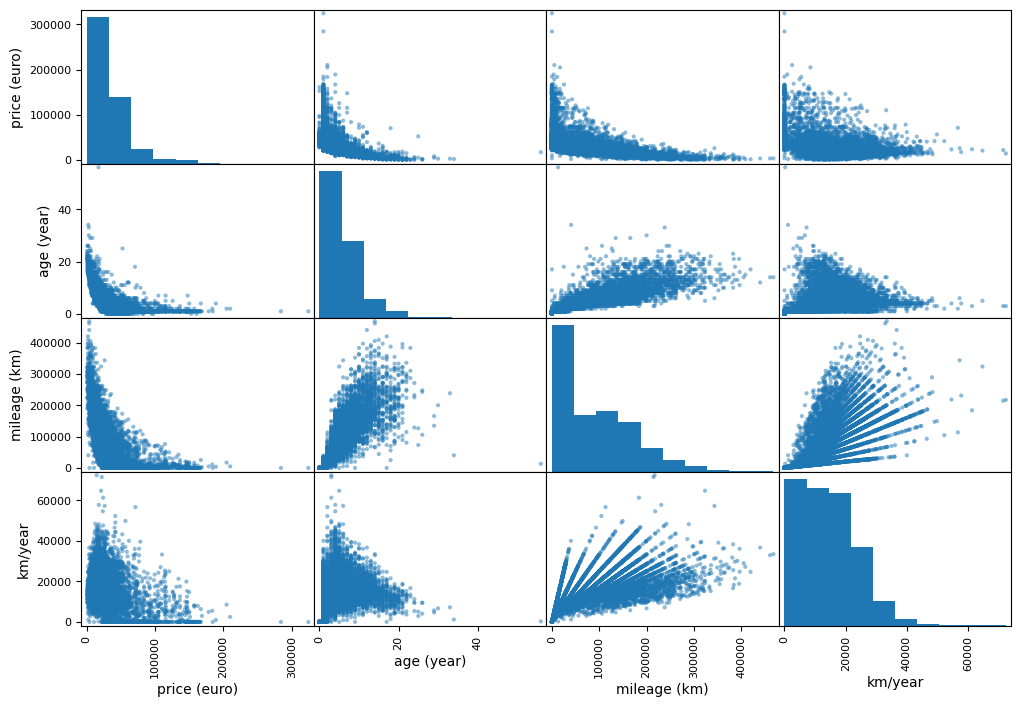

In [9]:
from pandas.plotting import scatter_matrix

attributes = ["price (euro)", "age (year)", "mileage (km)", "km/year"]
scatter_matrix(df_train[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")  # extra code
plt.show()

In [10]:
cols =["price (euro)", "age (year)", "mileage (km)"]
for col in cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_train = df_train[(df_train[col] >= lower) & (df_train[col] <= upper)]


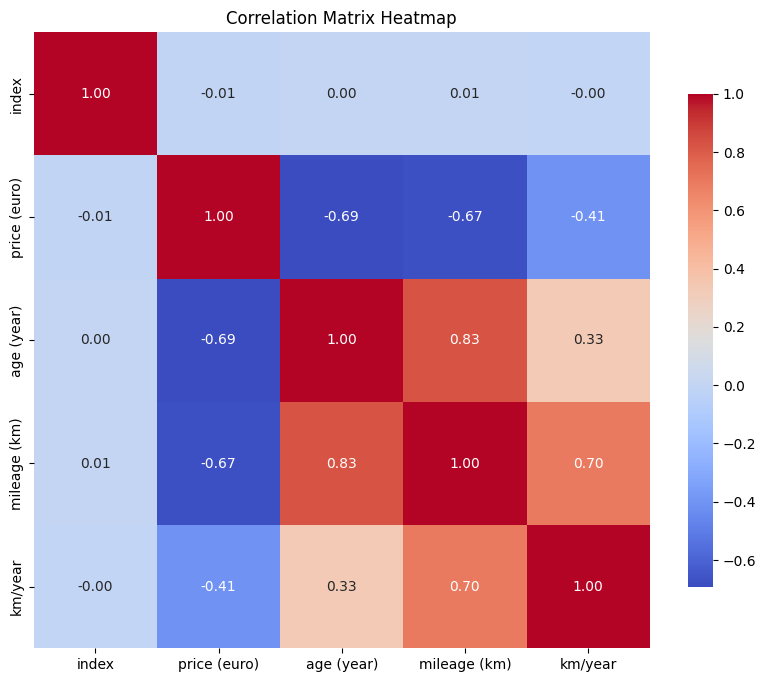

In [11]:
corr_matrix = df_train.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix Heatmap")
plt.show()

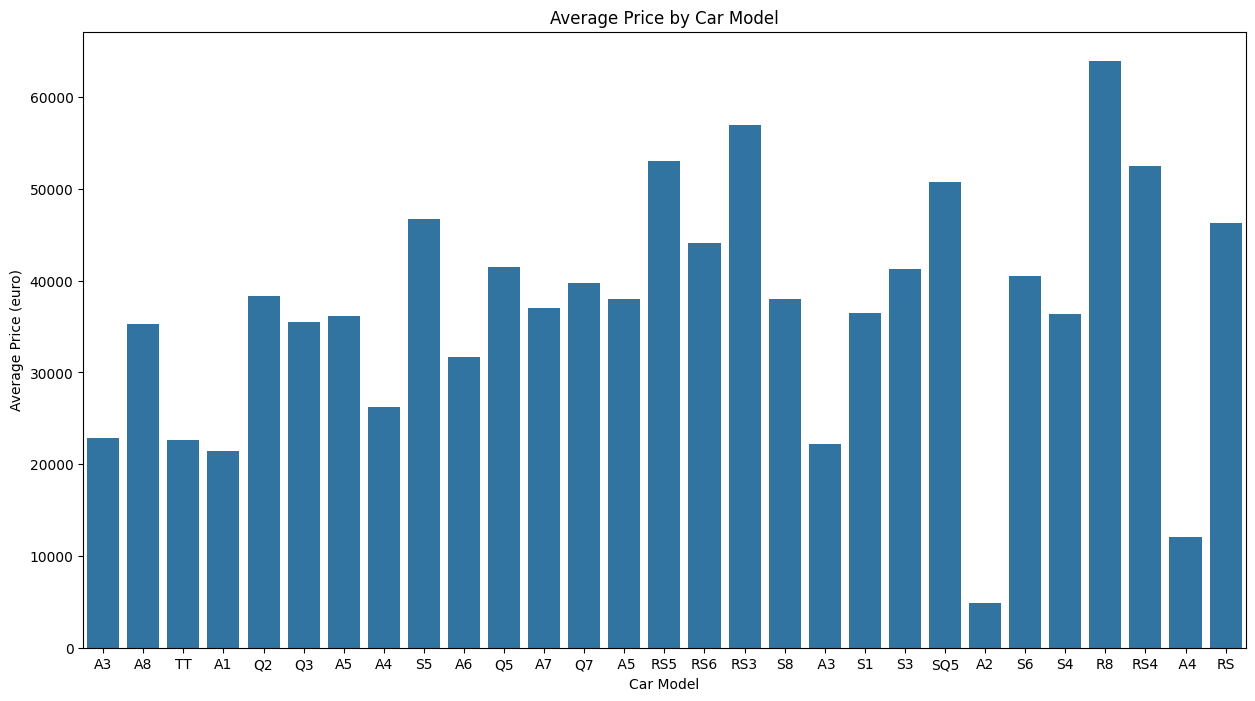

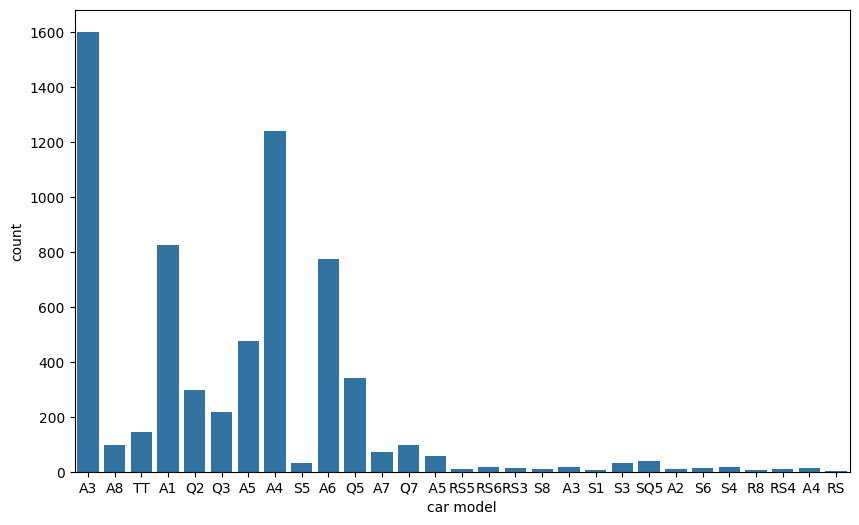

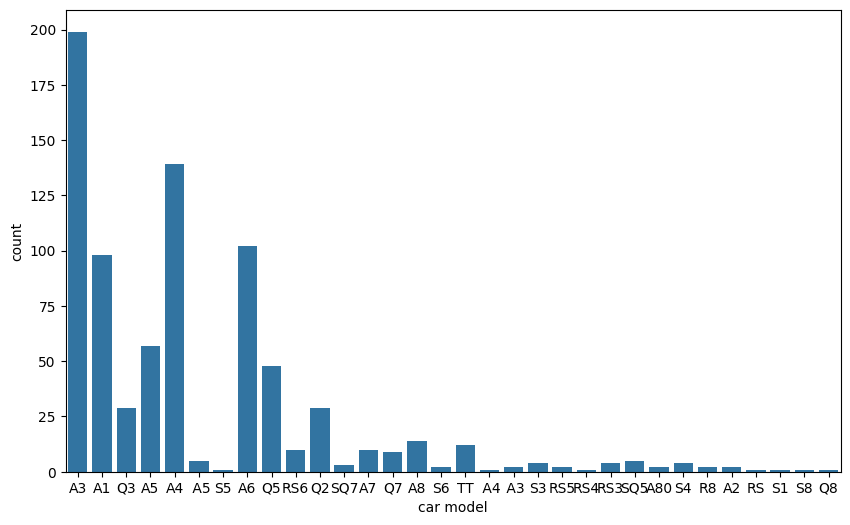

In [ ]:
prijzen = []
for i in df_train["car model"].unique():
    df_prijs = df_train[df_train["car model"] == i]
    price = np.average(df_prijs["price (euro)"])
    prijzen.append(price)

plt.figure(figsize=(15, 8))
sns.barplot(x=df_train["car model"].unique(), y=prijzen)
plt.title("Average Price by Car Model")
plt.xlabel("Car Model")
plt.ylabel("Average Price (euro)")
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='car model')
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='car model')

plt.show()

prijzen = []
for i in df_train["bodystyle"].unique():
    df_prijs = df_train[df_train["bodystyle"] == i]
    price = np.average(df_prijs["price (euro)"])
    prijzen.append(price)
plt.show()


In [13]:
# hoi = pd.concat([df_train["car model"].unique(), df_test["car model"].unique()])
dif = set(df_train["car model"].unique()) - set(df_test["car model"].unique())
dif

dif2 = [car for car in df_test["car model"] if car not in df_train["car model"].unique()]
print(dif2)

missing_values = df_train[~df_train['car model'].isin(df_test['car model'])]['car model']
missing_values

df_train.drop(df_train[df_train['car model'].isin(missing_values)].index, inplace=True)

['SQ7', 'SQ7', 'A80', 'SQ7', 'Q8', 'A80']


In [14]:

print(df_train["car model"].nunique())

29


In [15]:
df_dummy = pd.get_dummies(df_train)

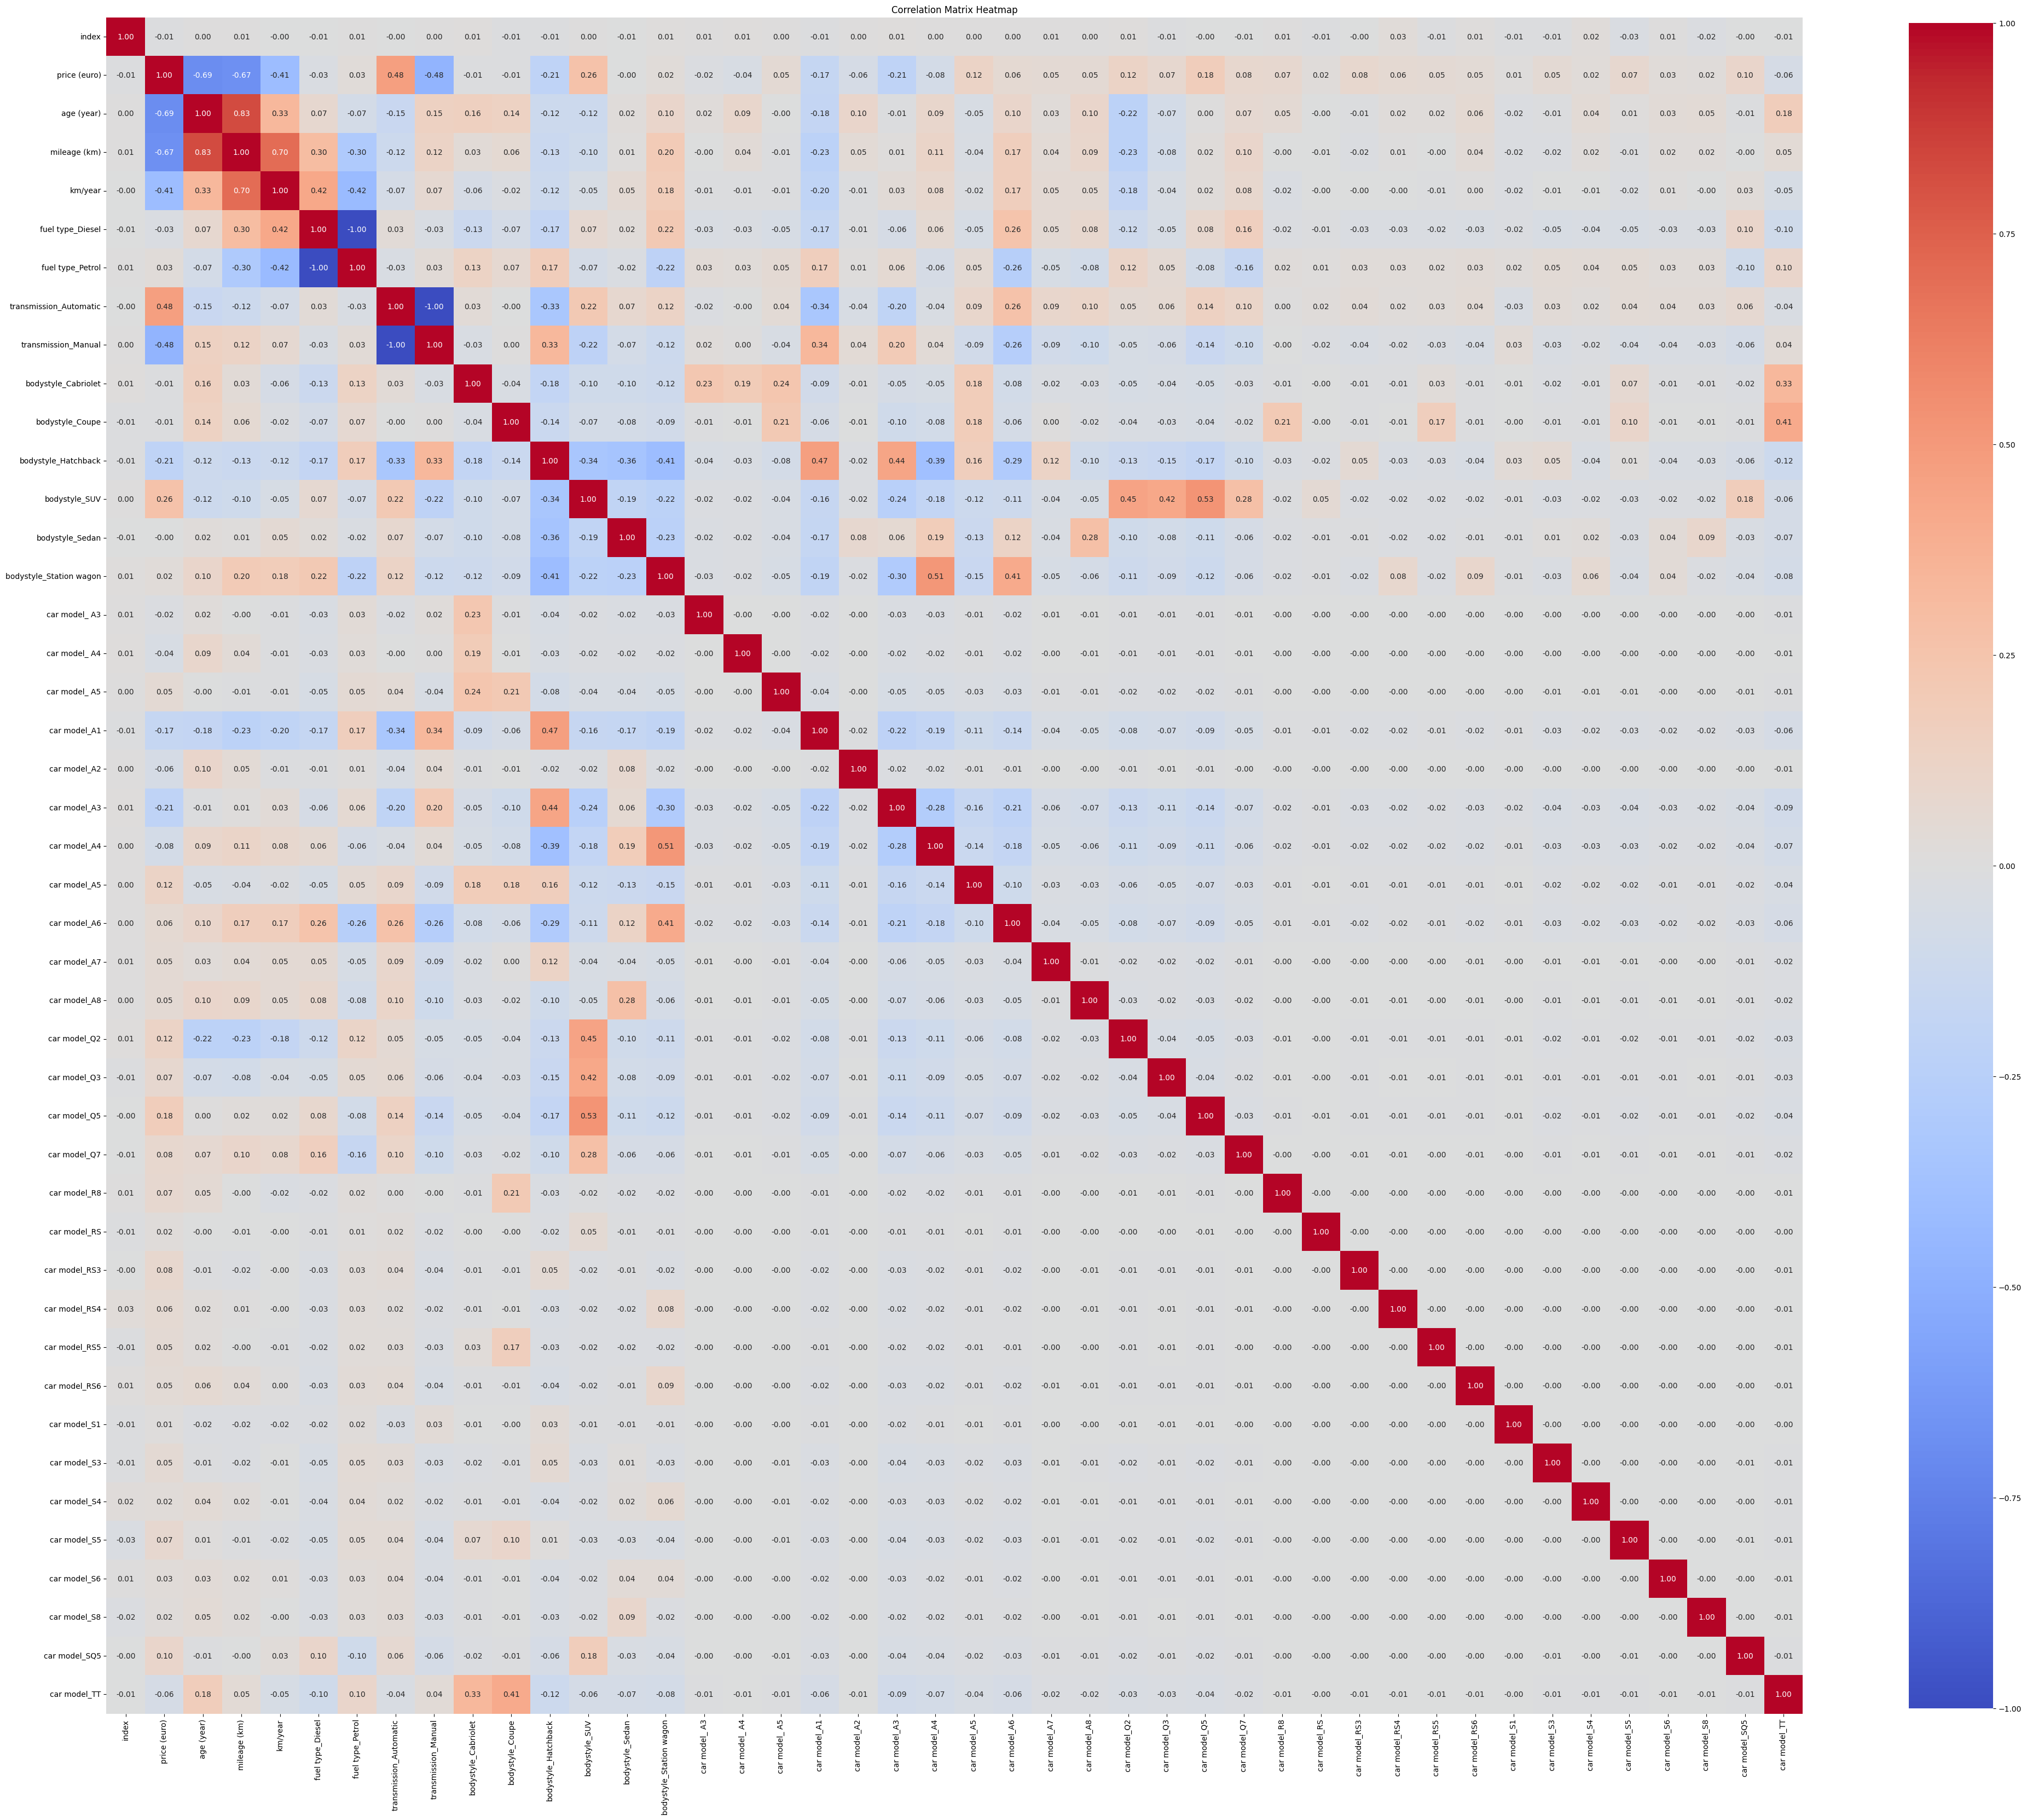

In [16]:
corr_matrix = df_dummy.corr(numeric_only=True)

plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix Heatmap")
plt.show()

In [17]:
abs(corr_matrix["price (euro)"].sort_values(ascending=True))

age (year)                 0.692527
mileage (km)               0.673529
transmission_Manual        0.476182
km/year                    0.407002
car model_A3               0.206169
bodystyle_Hatchback        0.205386
car model_A1               0.170961
car model_A4               0.078060
car model_A2               0.056442
car model_TT               0.056116
car model_ A4              0.043407
fuel type_Diesel           0.028642
car model_ A3              0.021019
bodystyle_Cabriolet        0.013473
index                      0.010137
bodystyle_Coupe            0.008365
bodystyle_Sedan            0.003631
car model_S1               0.012616
car model_S8               0.022395
car model_RS               0.022428
car model_S4               0.024163
bodystyle_Station wagon    0.024828
fuel type_Petrol           0.028642
car model_S6               0.031032
car model_RS6              0.045438
car model_A8               0.047445
car model_A7               0.051200
car model_ A5              0

Root Mean Squared Error: 6474.886397862325


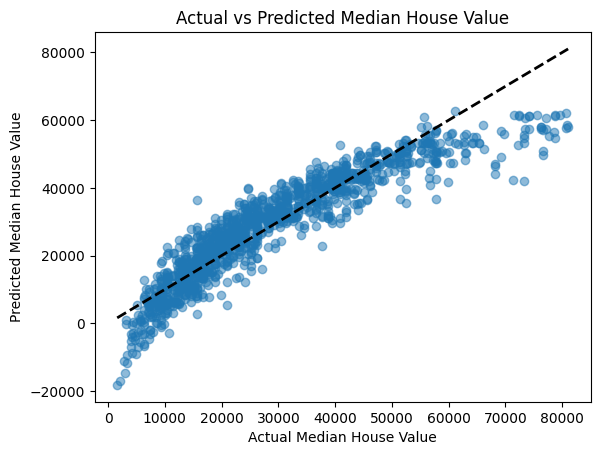

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(df_dummy.drop(columns='price (euro)'), df_dummy["price (euro)"],  test_size=0.2, random_state=42)

lin_reg = LinearRegression()

#min_max_scaler = MinMaxScaler(feature_range=(0, 1))
#X_train = min_max_scaler.fit_transform(X_train)
#X_test = min_max_scaler.transform(X_test)

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Value")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()